In [274]:
import pandas as pd
import numpy as np

In [275]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
from pandas_profiling import ProfileReport
from sklearn.cross_validation import train_test_split
import seaborn as sns
from sklearn import metrics

%matplotlib inline


In [276]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [277]:
Telecom = pd.read_csv("C:\\Users\\hp\\Desktop\\Data Science\\ML\\Clustering\\Telco Segmentation\\telco_csv.csv")

# EDA

In [278]:
Telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
region      1000 non-null int64
tenure      1000 non-null int64
age         1000 non-null int64
marital     1000 non-null int64
address     1000 non-null int64
income      1000 non-null int64
ed          1000 non-null int64
employ      1000 non-null int64
retire      1000 non-null int64
gender      1000 non-null int64
reside      1000 non-null int64
tollfree    1000 non-null int64
equip       1000 non-null int64
callcard    1000 non-null int64
wireless    1000 non-null int64
longmon     1000 non-null float64
tollmon     1000 non-null float64
equipmon    1000 non-null float64
cardmon     1000 non-null float64
wiremon     1000 non-null float64
multline    1000 non-null int64
voice       1000 non-null int64
pager       1000 non-null int64
internet    1000 non-null int64
callid      1000 non-null int64
callwait    1000 non-null int64
forward     1000 non-null int64
confer      1000 non

In [279]:
Telecom.columns

Index([u'region', u'tenure', u'age', u'marital', u'address', u'income', u'ed',
       u'employ', u'retire', u'gender', u'reside', u'tollfree', u'equip',
       u'callcard', u'wireless', u'longmon', u'tollmon', u'equipmon',
       u'cardmon', u'wiremon', u'multline', u'voice', u'pager', u'internet',
       u'callid', u'callwait', u'forward', u'confer', u'ebill', u'custcat'],
      dtype='object')

In [280]:
Telecom.shape

(1000, 30)

In [281]:
ProfileReport(Telecom)

Number of variables,30
Number of observations,1000
Total Missing (%),0.0%
Total size in memory,234.4 KiB
Average record size in memory,240.0 B
Numeric,12
Categorical,0
Boolean,16
Date,0
Text (Unique),0
Rejected,2


In [282]:
Telecom.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,...,0.475000,0.304000,0.2610,0.368000,0.481000,0.485000,0.493000,0.502000,0.371000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,...,0.499624,0.460213,0.4394,0.482503,0.499889,0.500025,0.500201,0.500246,0.483314,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,...,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,...,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


# Missing Value Treatment

In [283]:
# no missing value found
Telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
region      1000 non-null int64
tenure      1000 non-null int64
age         1000 non-null int64
marital     1000 non-null int64
address     1000 non-null int64
income      1000 non-null int64
ed          1000 non-null int64
employ      1000 non-null int64
retire      1000 non-null int64
gender      1000 non-null int64
reside      1000 non-null int64
tollfree    1000 non-null int64
equip       1000 non-null int64
callcard    1000 non-null int64
wireless    1000 non-null int64
longmon     1000 non-null float64
tollmon     1000 non-null float64
equipmon    1000 non-null float64
cardmon     1000 non-null float64
wiremon     1000 non-null float64
multline    1000 non-null int64
voice       1000 non-null int64
pager       1000 non-null int64
internet    1000 non-null int64
callid      1000 non-null int64
callwait    1000 non-null int64
forward     1000 non-null int64
confer      1000 non

# Outlier Treatment

In [284]:
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

Telecom=Telecom.apply(lambda x: outlier_capping(x))

In [285]:
Telecom.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.645100,0.495000,11.520000,73.785700,2.671000,10.951100,0.047000,0.517000,...,0.475000,0.304000,0.2610,0.368000,0.481000,0.485000,0.493000,0.502000,0.371000,2.487000
std,0.8162,21.359812,12.436692,0.500225,9.978335,77.561159,1.222397,9.970046,0.211745,0.499961,...,0.499624,0.460213,0.4394,0.482503,0.499889,0.500025,0.500201,0.500246,0.483314,1.120306
min,1.0000,1.000000,20.000000,0.000000,0.000000,10.990000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,...,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
max,3.0000,72.000000,70.010000,1.000000,43.000000,460.480000,5.000000,40.010000,1.000000,1.000000,...,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


# Feature Engineering

### Feature Transformation

##### Standardizing Data

In [286]:
# put data on the same scale.
sc=StandardScaler()
Telecom_scaled=sc.fit_transform(Telecom)
type(Telecom_scaled)

numpy.ndarray

In [287]:
pd.DataFrame(Telecom_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,...,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,2.304823e-16,-1.512124e-16,3.602674e-17,3.996803e-17,4.796163e-17,4.113376e-17,1.661449e-16,1.335598e-16,3.025358e-16,-2.111644e-16,...,-1.763034e-16,4.851675e-17,1.920686e-16,1.385558e-16,-2.176037e-17,2.331468e-18,-5.118128e-17,-2.153833e-17,2.264855e-17,-1.604272e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,...,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.252771e+00,-1.617209e+00,-1.741293e+00,-9.900495e-01,-1.155079e+00,-8.100333e-01,-1.367671e+00,-1.098950e+00,-2.220764e-01,-1.034598e+00,...,-9.511897e-01,-6.608946e-01,-5.942895e-01,-7.630717e-01,-9.626953e-01,-9.704368e-01,-9.860966e-01,-1.004008e+00,-7.680007e-01,-1.327980e+00
25%,-1.252771e+00,-8.677637e-01,-7.759238e-01,-9.900495e-01,-8.542771e-01,-5.777133e-01,-5.491964e-01,-7.978979e-01,-2.220764e-01,-1.034598e+00,...,-9.511897e-01,-6.608946e-01,-5.942895e-01,-7.630717e-01,-9.626953e-01,-9.704368e-01,-9.860966e-01,-1.004008e+00,-7.680007e-01,-1.327980e+00
50%,-2.696767e-02,-7.147832e-02,-1.323441e-01,-9.900495e-01,-2.526735e-01,-3.455222e-01,2.692781e-01,-2.961447e-01,-2.220764e-01,9.665588e-01,...,-9.511897e-01,-6.608946e-01,-5.942895e-01,-7.630717e-01,-9.626953e-01,-9.704368e-01,-9.860966e-01,9.960080e-01,-7.680007e-01,4.581396e-01
75%,1.198836e+00,8.653280e-01,7.525780e-01,1.010051e+00,6.497319e-01,1.188599e-01,1.087753e+00,6.070109e-01,-2.220764e-01,9.665588e-01,...,1.051315e+00,1.513101e+00,1.682682e+00,1.310493e+00,1.038750e+00,1.030464e+00,1.014099e+00,9.960080e-01,1.302082e+00,4.581396e-01
max,1.198836e+00,1.708454e+00,2.281884e+00,1.010051e+00,3.156414e+00,4.988164e+00,1.906227e+00,2.916079e+00,4.502954e+00,9.665588e-01,...,1.051315e+00,1.513101e+00,1.682682e+00,1.310493e+00,1.038750e+00,1.030464e+00,1.014099e+00,9.960080e-01,1.302082e+00,1.351199e+00


### Feature Creation

### Feature Selection 

In [288]:
# correlation - correlation matrix
Telecom.corr()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,custcat
region,1.000000,0.016388,0.012903,-0.080637,0.009533,0.023223,-0.057952,0.016618,0.005595,0.050596,...,-0.033015,-0.015158,0.000720,-0.000244,0.018199,0.010620,0.017541,-0.017269,0.030039,-0.023771
tenure,0.016388,1.000000,0.490613,0.154171,0.523968,0.290927,-0.109797,0.520351,0.171143,0.023533,...,0.409630,-0.005591,-0.020721,-0.140888,0.058311,0.086777,0.085884,0.133585,-0.157095,0.166691
age,0.012903,0.490613,1.000000,-0.011957,0.658073,0.388719,-0.154199,0.671798,0.419562,-0.013114,...,0.125595,-0.030625,-0.054286,-0.139855,0.082556,0.074877,0.082868,0.122958,-0.144105,0.059187
marital,-0.080637,0.154171,-0.011957,1.000000,-0.010709,-0.021195,0.001400,-0.001556,-0.078109,0.008345,...,0.091619,0.019654,0.044654,0.024220,0.035648,0.023712,0.043866,0.006040,-0.056495,0.083836
address,0.009533,0.523968,0.658073,-0.010709,1.000000,0.255677,-0.127278,0.459372,0.282156,0.006453,...,0.156613,-0.052115,-0.054958,-0.130435,0.034894,0.058743,0.080751,0.089632,-0.130124,0.069913
income,0.023223,0.290927,0.388719,-0.021195,0.255677,1.000000,0.124024,0.609636,-0.103679,0.040286,...,0.110432,0.126405,0.140025,-0.021190,0.172393,0.144545,0.143558,0.174063,-0.029922,0.171062
ed,-0.057952,-0.109797,-0.154199,0.001400,-0.127278,0.124024,1.000000,-0.227449,-0.114229,0.006704,...,0.265969,0.309637,0.301666,0.460052,0.031532,0.014027,0.029790,0.016628,0.405040,0.193864
employ,0.016618,0.520351,0.671798,-0.001556,0.459372,0.609636,-0.227449,1.000000,0.273281,0.044054,...,0.119225,-0.030786,-0.015814,-0.198302,0.143722,0.151557,0.116052,0.168114,-0.181322,0.110760
retire,0.005595,0.171143,0.419562,-0.078109,0.282156,-0.103679,-0.114229,0.273281,1.000000,0.053906,...,0.025311,-0.054319,-0.056666,-0.120472,0.032087,0.049210,0.036188,0.060538,-0.082524,0.008908
gender,0.050596,0.023533,-0.013114,0.008345,0.006453,0.040286,0.006704,0.044054,0.053906,1.000000,...,0.021740,0.016671,-0.031609,0.019685,0.001294,-0.031012,-0.035548,-0.002137,-0.015771,-0.004966


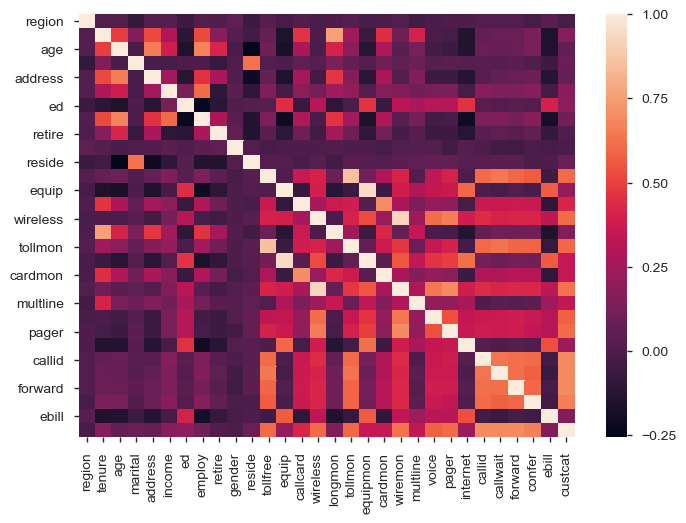

In [289]:
# correlation - Heatmap
sns.heatmap(Telecom.corr())

In [290]:
# correlation - VIF

#### Apply PCA

In [291]:
pc=PCA(n_components=30)
pc.fit(Telecom_scaled)

PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [292]:
var=pc.explained_variance_ratio_

In [293]:
var1=np.cumsum(np.round(var,4))

In [294]:
var1

array([0.2469, 0.4106, 0.5071, 0.5676, 0.608 , 0.644 , 0.6791, 0.7107,
       0.7403, 0.7666, 0.7891, 0.8104, 0.8307, 0.8486, 0.8647, 0.88  ,
       0.8946, 0.9091, 0.9222, 0.9343, 0.9461, 0.9573, 0.9674, 0.9757,
       0.9824, 0.9888, 0.9932, 0.9967, 0.999 , 0.9999])

In [295]:
#    or

In [296]:
for n in range(2,30):
    pc=PCA(n_components=n)
    pc.fit(Telecom_scaled)
    var = sum(pc.explained_variance_ratio_)
    print (n,var)

(2, 0.41055458921826304)
(3, 0.5070874408917869)
(4, 0.5676181223662088)
(5, 0.6079632133921375)
(6, 0.6439513187313554)
(7, 0.6790564750207086)
(8, 0.7106794624384087)
(9, 0.7402189083305523)
(10, 0.7665609373078149)
(11, 0.7891016876074964)
(12, 0.8103601727176102)
(13, 0.8307003455979083)
(14, 0.8486363124495826)
(15, 0.8647410088246382)
(16, 0.8800568718134048)
(17, 0.8946540797754142)
(18, 0.909196083929448)
(19, 0.9222696721912308)
(20, 0.9344068578889738)
(21, 0.9462307443000243)
(22, 0.957383489216504)
(23, 0.9674641731383162)
(24, 0.9757395487099376)
(25, 0.9824118125449322)
(26, 0.9888456774214074)
(27, 0.9932921116211)
(28, 0.9968103621251361)
(29, 0.9990981235320959)


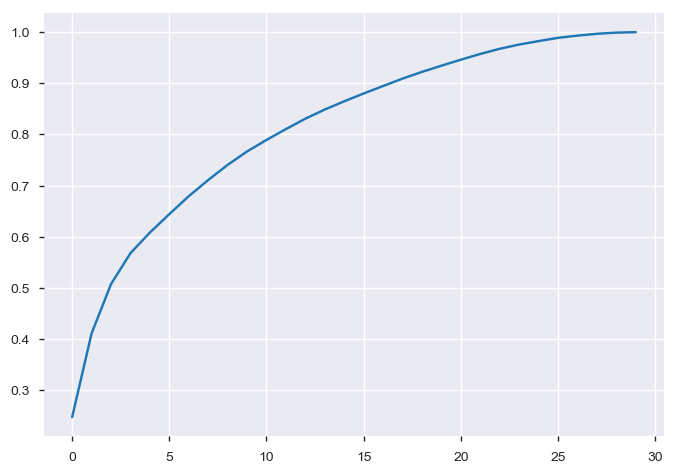

In [297]:
plt.plot(var1)

In [298]:
# by keeping 10 variable we can contaion 76.6% information
final_pc=PCA(n_components=10)

In [299]:
reduced_cr=final_pc.fit_transform(Telecom_scaled)

In [300]:
reduced_cr

array([[-2.60052819,  0.0310312 , -0.7905353 , ..., -0.56652828,
         0.92655548,  0.13509321],
       [ 3.22080405, -0.92995559, -2.87610062, ..., -1.44707679,
         0.89465525, -1.35265487],
       [ 0.69558568,  3.98868099, -0.29685538, ..., -0.42050388,
         0.32712281,  1.05088261],
       ...,
       [ 6.85671439,  0.9981964 ,  4.43793429, ..., -0.12214755,
         0.25385966,  0.31241748],
       [ 1.88339063,  3.44204209, -0.82110429, ...,  0.29859054,
        -0.57709699,  0.41561951],
       [-1.47718538, -1.76981986,  2.38741706, ..., -0.23849195,
        -0.30947484,  1.30520709]])

In [301]:
pd.DataFrame(reduced_cr).describe()

,0,1,2,3,4,5,6,7,8,9
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-1.405542e-16,-1.389999e-16,-3.952394e-17,5.551115e-18,-2.409184e-17,1.255940e-16,-1.931788e-17,1.229294e-16,1.282308e-16,-1.010303e-16
std,2.722838e+00,2.217006e+00,1.702611e+00,1.348241e+00,1.100791e+00,1.039617e+00,1.026687e+00,9.745248e-01,9.422966e-01,8.889222e-01
min,-4.231525e+00,-4.800439e+00,-4.088576e+00,-2.927603e+00,-4.343737e+00,-2.286088e+00,-2.258044e+00,-2.473613e+00,-2.865461e+00,-2.726183e+00
25%,-2.330420e+00,-1.706447e+00,-1.198918e+00,-1.181138e+00,-6.407990e-01,-6.765076e-01,-7.109884e-01,-6.626419e-01,-5.835498e-01,-6.328192e-01
50%,-4.658302e-01,-2.745900e-02,-5.681624e-02,-4.633277e-02,-7.987397e-02,-6.338755e-02,3.665569e-02,8.386696e-03,1.956835e-02,-4.645449e-02
75%,1.981726e+00,1.637036e+00,1.190348e+00,1.091045e+00,5.242749e-01,4.814472e-01,6.937315e-01,6.649064e-01,6.606439e-01,6.636891e-01
max,6.955453e+00,6.759499e+00,5.862520e+00,3.580267e+00,4.866980e+00,5.386954e+00,2.333435e+00,2.651160e+00,2.964171e+00,3.120788e+00


In [302]:
col_list=Telecom.columns

# Create Model

In [303]:
list_var = ['custcat','pager','wiremon','equipmon','ebill','multline','marital','income','retire','gender','region']

In [304]:
Telecom_scaled_1=pd.DataFrame(Telecom_scaled, columns=Telecom.columns)

In [305]:
Telecom_scaled_2=Telecom_scaled_1[list_var]

In [306]:
Telecom_scaled_2.head(2)

,custcat,pager,wiremon,equipmon,ebill,multline,marital,income,retire,gender,region
0,-1.327980,-0.594289,-0.598794,-0.749071,-0.768001,-0.95119,1.010051,-0.126231,-0.222076,-1.034598,-0.026968
1,1.351199,1.682682,1.275872,-0.749071,-0.768001,-0.95119,1.010051,0.802534,-0.222076,-1.034598,1.198836


In [307]:
# build model with different number of clusters
km_3=KMeans(n_clusters=3, random_state=45)
km_3.fit(Telecom_scaled_2)
            
km_4=KMeans(n_clusters=4,random_state=123).fit(Telecom_scaled_2)

km_5=KMeans(n_clusters=5,random_state=123).fit(Telecom_scaled_2)

km_6=KMeans(n_clusters=6,random_state=123).fit(Telecom_scaled_2)

km_7=KMeans(n_clusters=7,random_state=123).fit(Telecom_scaled_2)

km_8=KMeans(n_clusters=8,random_state=123).fit(Telecom_scaled_2)


Telecom['cluster_3'] = km_3.labels_
Telecom['cluster_4'] = km_4.labels_
Telecom['cluster_5'] = km_5.labels_
Telecom['cluster_6'] = km_6.labels_
Telecom['cluster_7'] = km_7.labels_
Telecom['cluster_8'] = km_8.labels_

In [308]:
# or 

In [337]:
Telecom_new=pd.DataFrame()
for n in range(3,10):
        KM=KMeans(n_clusters=n, random_state=45)
        KM.fit(Telecom_scaled_2)
        Telecom_new=pd.concat([Telecom_new, pd.Series(KM.labels_)],axis=1)

Telecom_new.columns=['cluster_3','cluster_4','cluster_5','cluster_6','cluster_7','cluster_8','cluster_9']

Telecom= pd.concat([Telecom, Telecom_new], axis=1)

In [338]:
Telecom.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,cluster_6,cluster_7,cluster_8,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9
0,2.0,13.0,44.0,1.0,9.0,64.0,4.0,5.0,0.0,0.0,...,1,6,1,1,3,1,5,1,0,5
1,3.0,11.0,33.0,1.0,7.0,136.0,5.0,5.0,0.0,0.0,...,2,3,2,2,2,2,2,2,1,3
2,3.0,68.0,52.0,1.0,24.0,116.0,1.0,29.0,0.0,1.0,...,4,6,1,1,3,1,5,1,7,5
3,2.0,33.0,33.0,0.0,12.0,33.0,2.0,0.0,0.0,1.0,...,4,2,3,1,3,1,3,3,7,8
4,2.0,23.0,30.0,1.0,9.0,30.0,1.0,2.0,0.0,0.0,...,1,6,1,1,3,1,5,1,0,5


In [311]:
Telecom.cluster_3.value_counts()

1    707
2    246
0     47
Name: cluster_3, dtype: int64

In [312]:
pd.Series(km_3.labels_).value_counts()

1    707
2    246
0     47
dtype: int64

In [313]:
size = pd.concat([pd.Series(Telecom.cluster_3.size), pd.Series.sort_index(Telecom.cluster_3.value_counts()),
             pd.Series.sort_index(Telecom.cluster_4.value_counts()), pd.Series.sort_index(Telecom.cluster_5.value_counts()),
             pd.Series.sort_index(Telecom.cluster_6.value_counts()) , pd.Series.sort_index(Telecom.cluster_7.value_counts()),
                 pd.Series.sort_index(Telecom.cluster_8.value_counts())])

In [314]:
seg_size=pd.DataFrame(size, columns=['seg_size'])
seg_size.T

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
seg_size,1000,47,707,246,47,285,433,235,220,266,...,47,164,87,160,200,174,122,47,166,44


In [315]:
mean=pd.concat([Telecom.apply(lambda x : x.mean()),Telecom.groupby('cluster_3').mean().T, Telecom.groupby('cluster_4').mean().T,
               Telecom.groupby('cluster_5').mean().T, Telecom.groupby('cluster_6').mean().T,
               Telecom.groupby('cluster_7').mean().T, Telecom.groupby('cluster_8').mean().T], axis=1)

In [316]:
Profiling_output=pd.concat([seg_size.T, mean], axis=0)

In [317]:
Profiling_output.head(3)

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
seg_size,1000.0000,47.000000,707.000000,246.000000,47.000000,285.000000,433.000000,235.000000,220.000000,266.000000,...,47.000000,164.000000,87.000000,160.00000,200.00,174.000000,122.000000,47.000000,166.000000,44.000000
address,11.5200,24.191489,10.934936,10.780488,24.191489,12.673684,9.794457,10.765957,10.522727,12.992481,...,24.191489,9.969512,7.793103,10.12500,10.10,9.919540,10.303279,24.191489,13.427711,19.386364
age,41.6451,65.129574,40.369180,40.825203,65.129574,41.807018,39.457298,40.782979,40.486364,42.748120,...,65.129574,40.140244,36.149425,40.16875,39.66,39.298908,39.393443,65.129574,42.126506,55.522727


In [318]:
Profiling_output.to_csv("Telecom_segmentation.csv")

# Find Optimal Number of Clusters

#### Dendogram



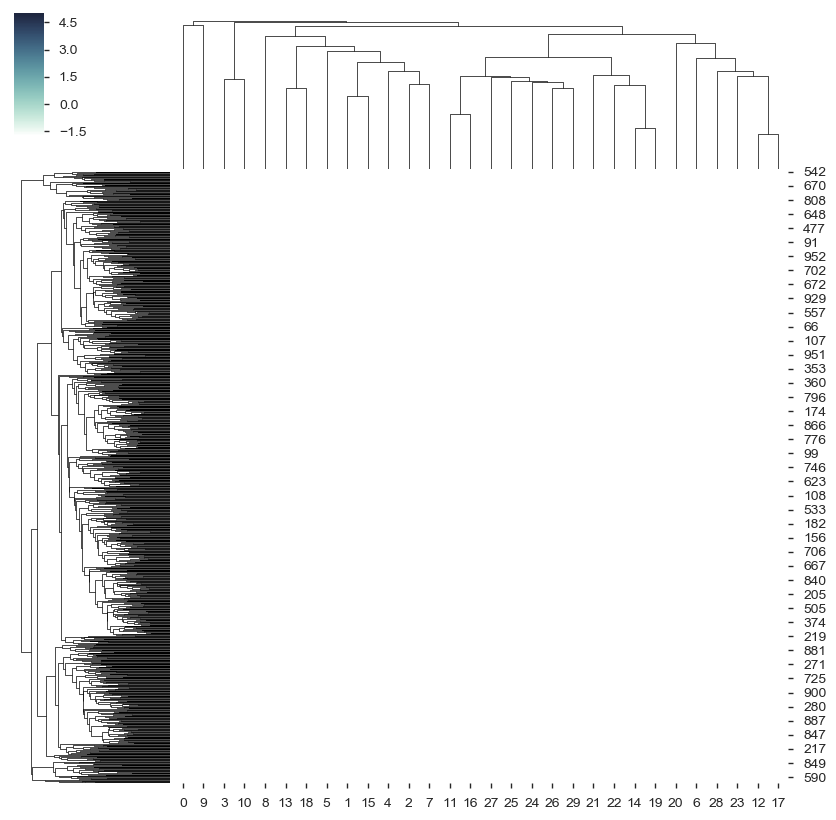

In [319]:
cmap = sns.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
g = sns.clustermap(Telecom_scaled, cmap=cmap, linewidths=.5)

#### Elbow Analysis

In [320]:
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( Telecom_scaled_2 )
    cluster_errors.append( clusters.inertia_ )

In [321]:
clusters_df = pd.concat([pd.Series(cluster_errors), pd.Series(cluster_range)], axis=1)
clusters_df.columns=['cluster_errors','num_clusters']
clusters_df.head(3)


,cluster_errors,num_clusters
0,11000.000000,1
1,8554.095726,2
2,7596.631044,3


In [322]:
type(clusters_df)

pandas.core.frame.DataFrame

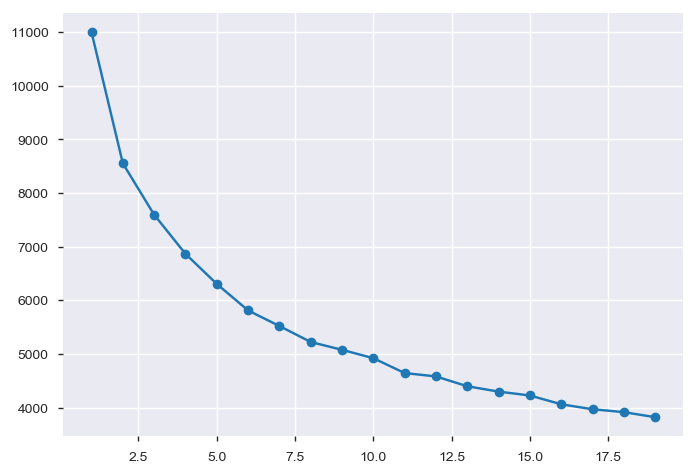

In [323]:
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker='o')

In [324]:
#The elbow diagram shows that the gain in explained variance reduces significantly from 3 to 4 to 5. 
#So, optimal number of clusters could either 4 or 5.

#### Silhouette Coefficient

In [325]:
k_range = range(3, 12)
score=[]
for k in k_range:
    km = KMeans(k)
    km.fit(Telecom_scaled_2)
    score.append(metrics.silhouette_score(Telecom_scaled_2, km.labels_))

In [326]:
score

[0.2874185443464996,
 0.1543542692171425,
 0.18047586068955632,
 0.18189274725455176,
 0.17543844803503103,
 0.15787685476814828,
 0.16687513445518107,
 0.17979923795270014,
 0.17970715459001366]

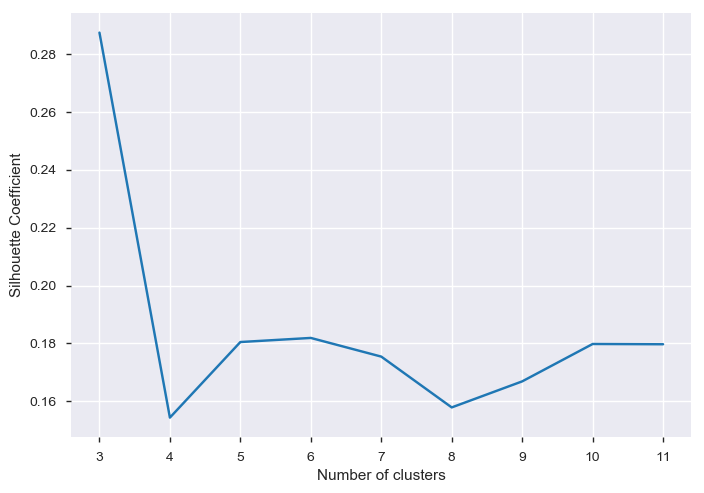

In [327]:
plt.plot(k_range,score)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)